# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

In [86]:
#Datos
v0=55
thet_radianes=np.rad2deg(45)
b=0.005
g=9.8

In [87]:
# funcion de la velocidad en x
def v0_x(v0,theta):
  return v0*np.cos(theta)

v0_x1=v0_x(55,thet_radianes)
print("el valor de la velocidad en la componente x es :",v0_x1)

el valor de la velocidad en la componente x es : -32.54969992845176


In [88]:
#funcion de la velocidad en y
def v0_y(v0,theta):
  return v0*np.sin(theta)

v0_y1=v0_y(55,thet_radianes)
print("el valor de la velocidad en la componente y es:",v0_y1)

el valor de la velocidad en la componente y es: 44.334152011375465


\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}


In [111]:
# Funcion parametrica, busco donde y=0, el resultado que me de es el valor de R, al encontrar el valor de R puedo reemplazarlo en la ecuacion del timepo y encontrar el tiempo en ese momento
#cuando se el tiempo en ese momento puedo hacer el resto de puntos, pero no se porque no me da la grafica :'( y usted esta ocupado para preguntarle
v0=55
theta=45
thet_radianes=np.deg2rad(45)
b=0.005
g=9.8
v0_y1=v0_y(55,thet_radianes)
v0_x1=v0_x(55,thet_radianes)

def funcion(R,g,b,v0_x1,v0_y1):
  return (((g)/(b))+(v0_y1))*((R)/(v0_x1))      +    ((g)/(b**2))    *     (np.log(1-(R*b)/(v0_x1)))




In [115]:

#def funcion(R,g,b,v0_x1,v0_y1):

#  T1= ( g/b+ v0_y1 ) * (R/v0_x1)
#  T2=(g/b**2)*(np.log(1-(R*b)/(v0_x1)))
#  y=T1+T2
#  return y


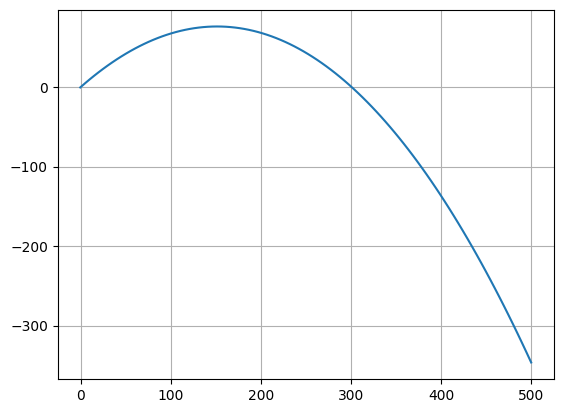

In [114]:
R=np.linspace(-0.5,500,100)
y=funcion(R,g,b,v0_x1,v0_y1)
plt.plot(R,y)
plt.grid()
plt.show()

In [116]:
d={"funcion":R , "funcion1":y}
df=pd.DataFrame(d)
df

,funcion,funcion1
0,-0.500000,-0.500810
1,4.555556,4.488296
2,9.611111,9.311605
3,14.666667,13.968900
4,19.722222,18.459967
...,...,...
95,479.777778,-298.109191
96,484.833333,-309.896765
97,489.888889,-321.872691
98,494.944444,-334.037230


In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

raiz_secante = optimize.newton(funcion,0.50)


TypeError: funcion() missing 4 required positional arguments: 'g', 'b', 'v0_x1', and 'v0_y1'

In [96]:
#funcion de x
def x(t,v0_1,b):
  return ((v0_x1)/(b)) * (1-np.exp(-b*t))


In [97]:
#funcion de t
def t(b,R,v0_x1):
  return (-1)/(b) * np.log(1-(R*b)/(v0_x1))

In [106]:
#funcion de y
def y(t,v0_1,b):
  return ((1)/(b))* ((g)/(b)+ v0_y1) *  (1-np.exp(-b*t)) - ((g)/(b))*(t)